# Stime, stimatori e parametri {#sec-sampling-distr}

**Prerequisiti**

**Concetti e Competenze Chiave**

- Comprendere e analizzare come le stime dei parametri della popolazione variano da campione a campione.
- Definire le nozioni di popolazione, campione, parametro, stima e stimatore.
- Esplorare la connessione tra stime campionarie e parametri reali della popolazione.
- Calcolare e interpretare il valore atteso e la varianza della media campionaria.
- Utilizzare l'errore standard per rappresentare l'incertezza nelle stime dei parametri.
- Comprendere la convergenza delle medie campionarie alla media della popolazione.
- Applicare il teorema per approssimare distribuzioni campionarie con distribuzioni normali.
- Analizzare la distribuzione campionaria di statistiche come la varianza e il valore massimo del campione.

**Preparazione del Notebook**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
import arviz as az
import itertools

In [3]:
seed: int = sum(map(ord, "sampling_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo, approfondiremo il concetto di *distribuzione campionaria* che costituisce uno dei pilastri dell'inferenza statistica frequentista. La distribuzione campionaria ci permette di comprendere come le stime dei parametri della popolazione, come la media o la varianza, cambiano da campione a campione. In particolare, la distribuzione campionaria ci consente di stabilire delle proprietà probabilistiche delle stime campionarie, come ad esempio la loro media e la loro varianza. Queste proprietà verranno utilizzate per costruire gli strumenti fondamentali dell'inferenza frequentista: gli intervalli di fiducia e i test di ipotesi.

## Popolazione e campioni

Nell'analisi dei dati, l'obiettivo spesso è comprendere una quantità specifica a livello di popolazione, ma in genere abbiamo accesso solo a un campione di osservazioni. La quantità sconosciuta che vogliamo determinare viene chiamata *parametro*. Quando usiamo i dati del campione per calcolare una misura di questo parametro, la misura ottenuta è chiamata *stima*, e la formula che utilizziamo per ottenerla è conosciuta come *stimatore*. In termini formali, uno stimatore è una funzione dei dati osservati, utilizzata per fornire un'approssimazione del parametro di interesse.

In pratica, quando analizziamo un campione di dati, il nostro obiettivo è inferire determinate proprietà della popolazione intera dalla quale il campione è stato tratto. Il parametro è l'indicatore numerico di queste proprietà, ma poiché spesso non possiamo calcolarlo direttamente sulla popolazione, ricorriamo alle osservazioni del campione per stimarlo. La stima, quindi, rappresenta il valore approssimato del parametro ottenuto dal campione, mentre lo stimatore è la regola o la formula matematica che usiamo per arrivare a questa approssimazione.

È importante riconoscere che le stime possono non corrispondere esattamente ai parametri che vogliamo comprendere. In altre parole, le stime sono solo approssimazioni del parametro a causa della natura aleatoria del campionamento. 

## La relazione tra stime e parametri

In questo capitolo, ci concentreremo sulla relazione tra le stime ottenute dai campioni e i parametri reali della popolazione, esplorando in particolare la connessione tra la media di un campione e la media della popolazione, denotata con $\mu$. Il nostro obiettivo è capire e caratterizzare l'incertezza che deriva dalla natura aleatoria delle stime, e per farlo, adotteremo l'approccio frequentista, facendo uso di un importante strumento statistico chiamato *distribuzione campionaria*.

### Distribuzione campionaria

Per illustrare il concetto di distribuzione campionaria, possiamo iniziare considerando un caso semplice e specifico: una popolazione finita di dimensioni ridotte. Sebbene stiamo esaminando un caso particolare, è fondamentale notare che le proprietà e i principi che analizzeremo in questo contesto sono perfettamente applicabili a popolazioni di qualsiasi dimensione.

La distribuzione campionaria ci dà una visione della variazione che potremmo aspettarci nelle stime derivate da diversi campioni estratti dalla stessa popolazione. Ogni volta che preleviamo un campione, otteniamo una stima diversa per il parametro di interesse (come la media). La distribuzione campionaria ci mostra come queste stime sono distribuite e ci aiuta a comprendere quanto siano affidabili.

In termini pratici, se vogliamo calcolare la media della popolazione, non possiamo farlo direttamente (a meno di non avere accesso all'intera popolazione). Invece, possiamo estrarre un campione casuale e calcolare la media del campione come stima di $\mu$. Tuttavia, un altro campione fornirà una stima leggermente diversa. La distribuzione campionaria ci aiuta a capire quanto queste stime varino da campione a campione e ci fornisce un quadro completo dell'incertezza legata al processo di stima.

Nella simulazione seguente, ipotizziamo la seguente popolazione:

In [4]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


L'istogramma seguente descrive la distribuzione di frequenza della popolazione.

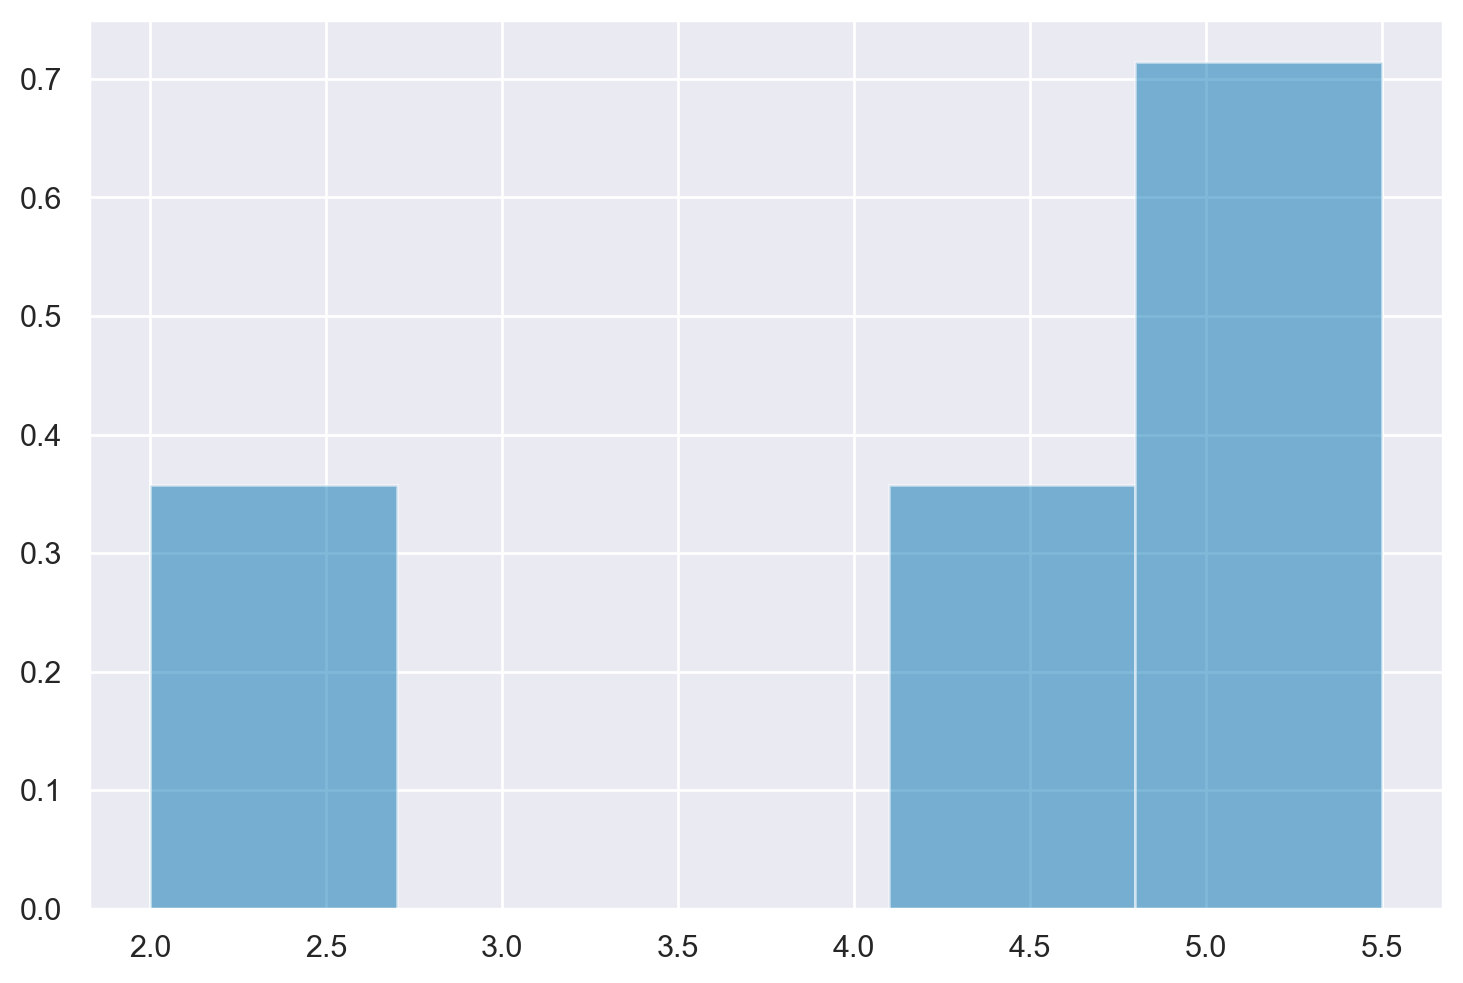

In [5]:
plt.hist(x, bins=5, density=True, alpha=0.5);

Intervalli utilizzati per l'istogramma: [2.  2.7 3.4 4.1 4.8 5.5]
Frequenze relative utilizzate per l'istogramma: [0.35714286 0.         0.         0.35714286 0.71428571]


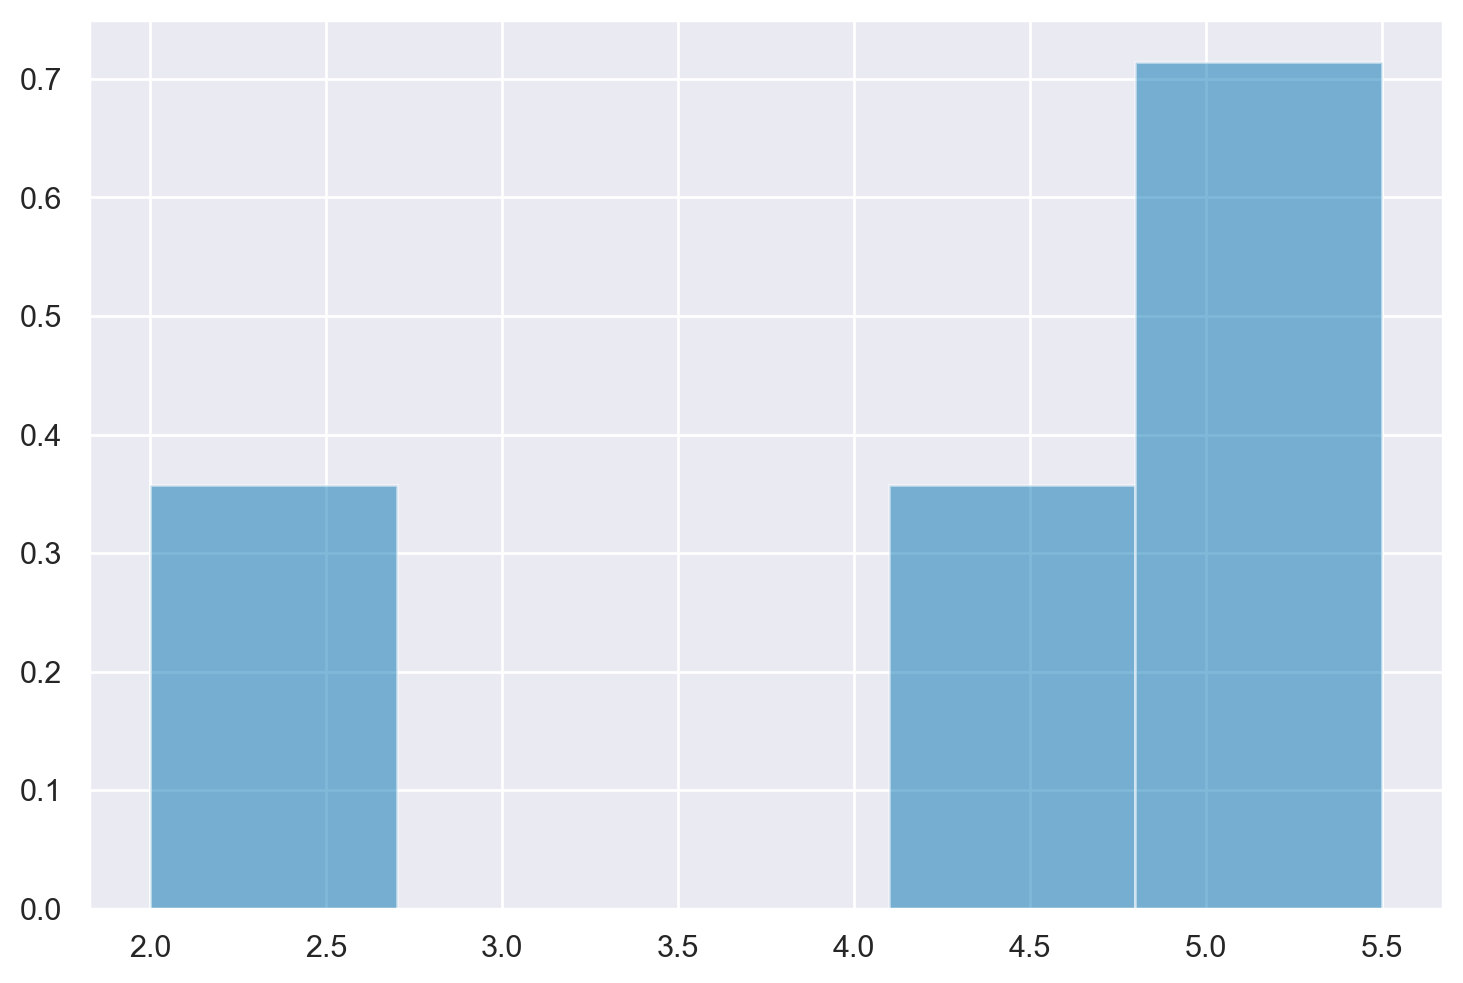

In [6]:
conteggi, intervalli, _ = plt.hist(x, bins=5, density=True, alpha=0.5)

# Stampiamo gli intervalli utilizzati per l'istogramma
print("Intervalli utilizzati per l'istogramma:", intervalli)
print("Frequenze relative utilizzate per l'istogramma:", conteggi)

Le frequenze assolute si ottengono usando l'argomento `density=False`.

Frequenze assolute utilizzate per l'istogramma: [1. 0. 0. 1. 2.]


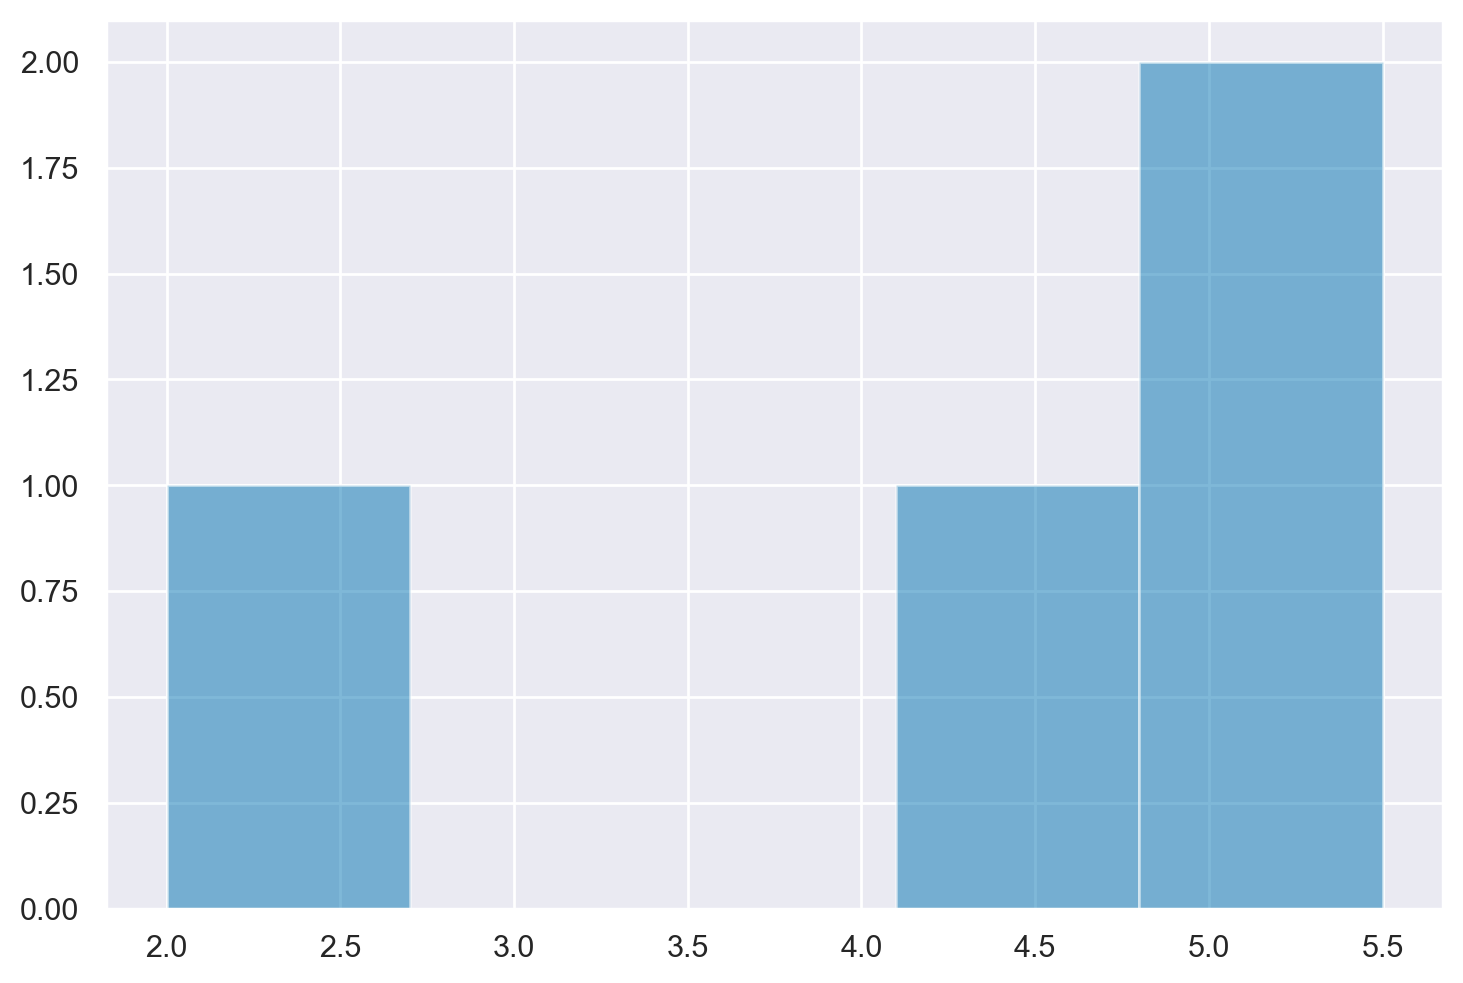

In [7]:
conteggi, intervalli, _ = plt.hist(x, bins=5, density=False, alpha=0.5)
print("Frequenze assolute utilizzate per l'istogramma:", conteggi)

Calcoliamo la media e la varianza della popolazione.

In [18]:
(np.mean(x), np.var(x, ddof=0))

(4.25, 1.8125)

Supponiamo ora di voler considerare l'estrazione di tutti i possibili campioni di dimensione $n$ = 2 da una popolazione rappresentata dall'array `x`. Per fare ciò, possiamo fare uso di uno strumento di programmazione, come la funzione `product` del modulo `itertools` in Python. 

Specificamente, possiamo utilizzare `product` con l'argomento `repeat` impostato a 2, che indica che vogliamo formare tutte le possibili coppie di valori. In altre parole, stiamo cercando tutte le combinazioni in cui ogni valore nell'array `x` può essere abbinato a se stesso o a un altro valore nell'array.

Dopo aver utilizzato la funzione `product`, otteniamo una lista di tuple, che rappresenta tutte le possibili coppie di valori. Possiamo convertire questa lista in un array NumPy più maneggevole utilizzando la funzione `np.array`. Stampando il risultato, otteniamo un array con 16 righe e 2 colonne, che rappresenta tutte le possibili coppie che possono essere formate dall'array `x`.

Questa rappresentazione di tutte le possibili coppie è coerente con un concetto matematico fondamentale: se stiamo scegliendo 2 elementi da un insieme di 4, e ogni elemento può essere scelto più di una volta (ossia con ripetizione), il numero totale di possibili combinazioni sarà $4^2 = 16 $. Questo si spiega dal fatto che ci sono 4 scelte per il primo elemento e 4 scelte per il secondo elemento, risultando in un totale di $4 \times 4 = 16$ possibili coppie.

In [9]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


Convertiamo l'output di `itertools.product` in un array NumPy per sfruttare le funzionalità di questa libreria. L'array risultante, `samples`, è un array 2D, dove ogni riga rappresenta una coppia di valori.

In [10]:
samples.shape

(16, 2)

Per calcolare la media di ogni campione di ampiezza $n=2$, possiamo utilizzare la funzione `mean` del modulo NumPy e applicarla lungo l'asse delle colonne dell'array di coppie di valori. In questo modo otterremo un array unidimensionale contenente la media di ciascuna coppia di valori. Questo insieme di valori costituisce la *distribuzione campionaria* delle medie di campioni di ampiezza $n=2$ che possono essere estratti dalla popolazione `x`.

In [11]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


La funzione `np.mean(samples, axis=1)` calcola la media lungo l'asse specificato, che in questo caso è l'asse 1. In NumPy, l'asse 0 rappresenta le righe (verticale) e l'asse 1 rappresenta le colonne (orizzontale).

Una rappresentazione grafica della distribuzione campionaria dei campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x` è fornita qui sotto.

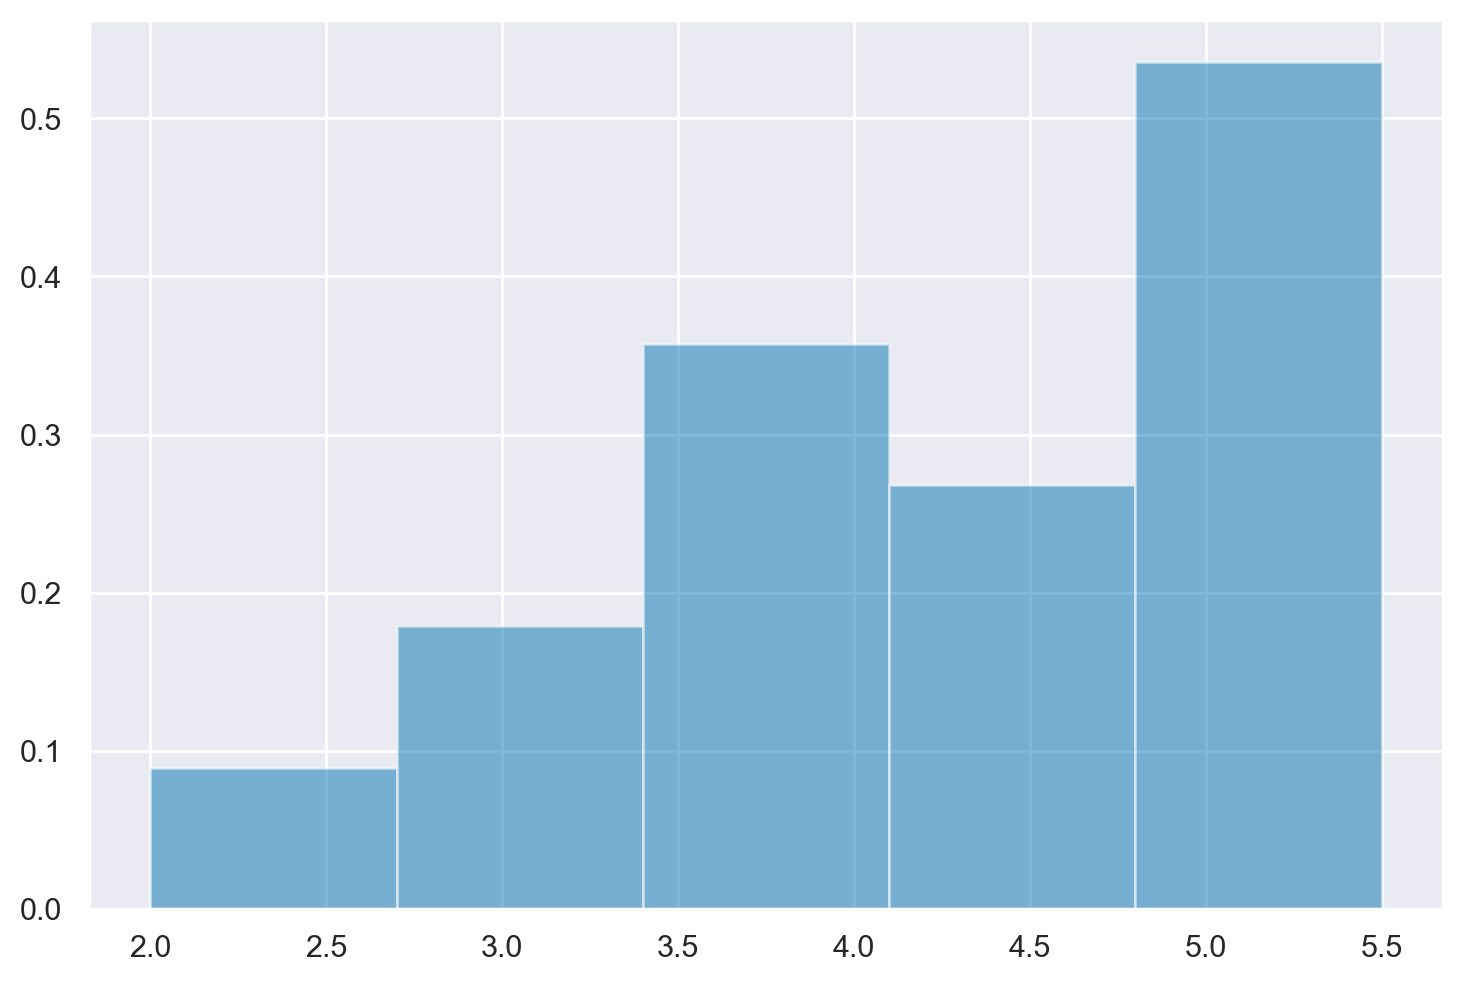

In [12]:
plt.hist(means, bins=5, density=True, alpha=0.5);

Mostriamo qui nuovamente la lista di tutti i possibili campioni di ampiezza 2 insieme alla media di ciascun campione.

In [13]:
df = pd.DataFrame()
df["Samples"] = list(itertools.product(x, x))
df["x_bar"] = np.mean(list(itertools.product(x, x)), axis=1)
df

,Samples,x_bar
0,"(2.0, 2.0)",2.00
1,"(2.0, 4.5)",3.25
2,"(2.0, 5.0)",3.50
3,"(2.0, 5.5)",3.75
4,"(4.5, 2.0)",3.25
5,"(4.5, 4.5)",4.50
6,"(4.5, 5.0)",4.75
7,"(4.5, 5.5)",5.00
8,"(5.0, 2.0)",3.50
9,"(5.0, 4.5)",4.75


Procediamo ora al calcolo della media della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. 

### Valore atteso della media campionaria

Supponiamo che $ X_1, X_2, \ldots, X_n $ siano variabili aleatorie iid con valore atteso $ \mu $ e varianza $ \sigma^2 $. Vogliamo trovare il valore atteso della media campionaria:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i 
$$

Ecco la dimostrazione:

$$
\begin{align*}
\mathbb{E}(\bar{X}) & = \mathbb{E}\left(\frac{1}{n} \sum_{i=1}^n X_i\right) \\
& = \frac{1}{n} \mathbb{E}\left(\sum_{i=1}^n X_i\right) \\
& = \frac{1}{n} \sum_{i=1}^n \mathbb{E}(X_i) \\
& = \frac{1}{n} \sum_{i=1}^n \mu \\
& = \frac{1}{n} \cdot n \cdot \mu \\
& = \mu
\end{align*}
$$

Quindi, il valore atteso della media campionaria di $ n $ variabili iid è uguale al valore atteso di ciascuna variabile singola, che in questo caso è $ \mu $.

Verifichiamo che ciò sia vero nel nostro caso specifico.

In [27]:
(np.mean(x), np.mean(means))

(4.25, 4.25)

### Varianza della media campionaria

Dato che le variabili $X_1, X_2, \ldots, X_n$ sono indipendenti ed identicamente distribuite (iid) con valore atteso $\mu$ e varianza $\sigma^2$, possiamo calcolare la varianza della media campionaria $\bar{X}$ come segue:

$$
\begin{align*}
\text{Var}(\bar{X}) & = \text{Var}\left(\frac{1}{n} \sum_{i=1}^n X_i\right) \\
& = \frac{1}{n^2} \text{Var}\left(\sum_{i=1}^n X_i\right) \\
& = \frac{1}{n^2} \sum_{i=1}^n \text{Var}(X_i) \quad \text{(dato che le $X_i$ sono indipendenti, i termini incrociati si annullano)} \\
& = \frac{1}{n^2} \sum_{i=1}^n \sigma^2 \\
& = \frac{1}{n^2} \cdot n \cdot \sigma^2 \\
& = \frac{\sigma^2}{n}
\end{align*}
$$

Quindi, la varianza della media campionaria di $n$ variabili iid è uguale alla varianza di ciascuna variabile singola divisa per $n$, che in questo caso è $\sigma^2/n$.

Per l'esempio in discussione, il valore della varianza delle medie dei campioni è dunque pari a

In [28]:
np.var(x, ddof=0) / 2

0.90625

Lo stesso risultato si ottiene facendo la media delle 16 medie che abbiamo trovato in precedenza.

In [29]:
np.var(means, ddof=0) 

0.90625

Consideriamo ora un particolare campione. Per esempio

In [30]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


Troviamo la media del campione:

In [31]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


La media del campione è diversa dalla media della popolazione ($\mu$ = 4.25).

Troviamo la deviazione standard del campione:

In [32]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


La deviazione standard del campione è diversa dalla deviazione standard della popolazione:

In [21]:
np.std(x, ddof=0)

1.346291201783626

In conclusione, possiamo sottolineare due risultati centrali che emergono dall'analisi delle medie campionarie:

1. **Media delle medie campionarie e media della popolazione**: La media della distribuzione delle medie campionarie è identica alla media della popolazione. In termini matematici, questo significa che il valore atteso della media dei campioni (con ripetizione) da una popolazione (finita o infinita) con media $ \mu $ è:

$$
   \mathbb{E}(\bar{X}_n) = \mu.
$$

2. **Varianza delle medie campionarie e varianza della popolazione**: La varianza della distribuzione delle medie campionarie è inferiore alla varianza della popolazione e, precisamente, è pari alla varianza della popolazione divisa per la dimensione del campione:

$$
   \mathbb{V}(\bar{X}_n) = \frac{\sigma^2}{n}.
$$

Questi risultati, che abbiamo verificato empiricamente attraverso la simulazione, ci offrono una comprensione profonda del comportamento delle medie campionarie.

Inoltre, è importante notare che il comportamento della distribuzione delle medie campionarie dipende dalla forma della distribuzione della popolazione stessa:

- Se la popolazione segue una distribuzione normale, allora la distribuzione delle medie dei campioni sarà anch'essa normale.
- Se la popolazione non segue una distribuzione normale, il teorema del limite centrale entra in gioco, assicurando che, man mano che le dimensioni del campione aumentano, la distribuzione delle medie dei campioni converga a una distribuzione normale.

Questi principi sono fondamentali in statistica e forniscono la base per molte tecniche di inferenza e modellazione.

## Errore standard e rappresentazione dell'incertezza inferenziale

Nella statistica inferenziale, l'errore standard è una misura frequentemente utilizzata per rappresentare l'incertezza legata a un parametro stimato, conosciuta anche come incertezza inferenziale. L'errore standard quantifica quanto possa variare la stima di una statistica da un campione all'altro; un errore standard minore indica una stima più precisa, mentre uno maggiore implica maggiore incertezza. Spesso, le rappresentazioni grafiche includono gli errori standard nella forma di "media più o meno uno (o due) errori standard." Questa espressione fornisce una gamma di valori entro cui è plausibile che ricada il valore vero del parametro della popolazione.

L'uso dell'errore standard nei grafici non è soltanto una convenzione; esso è uno strumento per quantificare e visualizzare l'incertezza inferenziale. Contribuisce alla comprensione dell'affidabilità delle stime ottenute dai dati campionari, permettendo di valutare quanto le stime possano variare se si prendesse un altro campione dalla stessa popolazione. Tuttavia, è importante notare che questo utilizzo dell'errore standard può essere problematico [@ward2022control].

## Legge dei Grandi Numeri

La Legge dei Grandi Numeri (LLN) è un principio fondamentale della teoria delle probabilità che stabilisce come, incrementando il numero $n$ di osservazioni, la media campionaria $\bar{X}_n$ tenda asintoticamente alla media teorica $\mu$. La LLN si articola in due varianti: la versione "forte" e quella "debole", le quali differiscono per il tipo di convergenza verso la media attesa.

### Versione Forte della Legge dei Grandi Numeri (SLLN)

La SLLN afferma che la media campionaria $ \bar{X}_n $ converge quasi certamente alla media teorica $\mu$, ovvero la convergenza avviene con probabilità 1. Questo implica che, per quasi ogni possibile sequenza di eventi nell'insieme campionario $S$, $\bar{X}_n(s)$ tende a $\mu$, ad eccezione di un insieme di eventi $B_0$ la cui probabilità è zero. In termini tecnici, si dice che $\bar{X}_n$ converge a $\mu$ "quasi certamente".

### Versione Debole della Legge dei Grandi Numeri (WLLN)

La WLLN afferma che, per ogni $\epsilon > 0$, la probabilità che la media campionaria $\bar{X}_n$ si discosti da $\mu$ di una quantità maggiore di $\epsilon$ tende a zero all'aumentare di $n$. Questo fenomeno è definito come convergenza in probabilità verso la media teorica $\mu$.

### Implicazioni e Applicazioni

La Legge dei Grandi Numeri riveste un ruolo cruciale nel campo delle simulazioni, della statistica e, più in generale, nelle discipline scientifiche. La generazione di dati attraverso numerose repliche indipendenti di un esperimento, sia in ambito simulativo che empirico, implica l'utilizzo della media campionaria come stima affidabile della media teorica della variabile di interesse. In pratica, la LLN fornisce una base teorica per l'affidabilità delle stime medie ottenute da grandi campioni di dati, sottolineando come, a fronte di un numero elevato di osservazioni, le fluttuazioni casuali tendano ad annullarsi, convergendo verso un valore stabile e prevedibile.

::: {#exm-}

Siano $X_1, X_2, \ldots$ variabili aleatorie indipendenti e identicamente distribuite secondo una distribuzione di Bernoulli con parametro $1/2$. Interpretando gli $X_j$ come indicatori di "Testa" in una sequenza di lanci di una moneta equa, $\bar{X}_n$ rappresenta la proporzione di "Testa" dopo $n$ lanci. La Legge Forte dei Grandi Numeri (SLLN) afferma che, con probabilità 1, la sequenza di variabili aleatorie $\bar{X}_1, \bar{X}_2, \bar{X}_3, \ldots$ convergerà a $1/2$ quando si cristallizza in una sequenza di numeri reali. Matematicamente parlando, esistono scenari improbabili come una sequenza infinita di "Testa" (HHHHHH...) o sequenze irregolari come HHTHHTHHTHHT..., ma queste hanno una probabilità collettiva di zero di verificarsi. La Legge Debole dei Grandi Numeri (WLLN) stabilisce che, per ogni $\epsilon > 0$, la probabilità che $\bar{X}_n$ sia distante più di $\epsilon$ da $1/2$ può essere resa arbitrariamente piccola aumentando $n$.

Come illustrazione, abbiamo simulato sei sequenze di lanci di una moneta equa e, per ciascuna sequenza, abbiamo calcolato $\bar{X}_n$ in funzione di $n$. Ovviamente, nella realtà non possiamo effettuare un numero infinito di lanci, quindi ci siamo fermati dopo 300 lanci. Il grafico seguente mostra $\bar{X}_n$ in funzione di $ n $ per ciascuna delle sei sequenze. All'inizio, notiamo una certa variazione nella proporzione cumulativa di "Testa". Tuttavia, con l'aumentare del numero di lanci, la varianza $ \text{Var}(\bar{X}_n) $ diminuisce progressivamente e $\bar{X}_n$ tende a $1/2$.

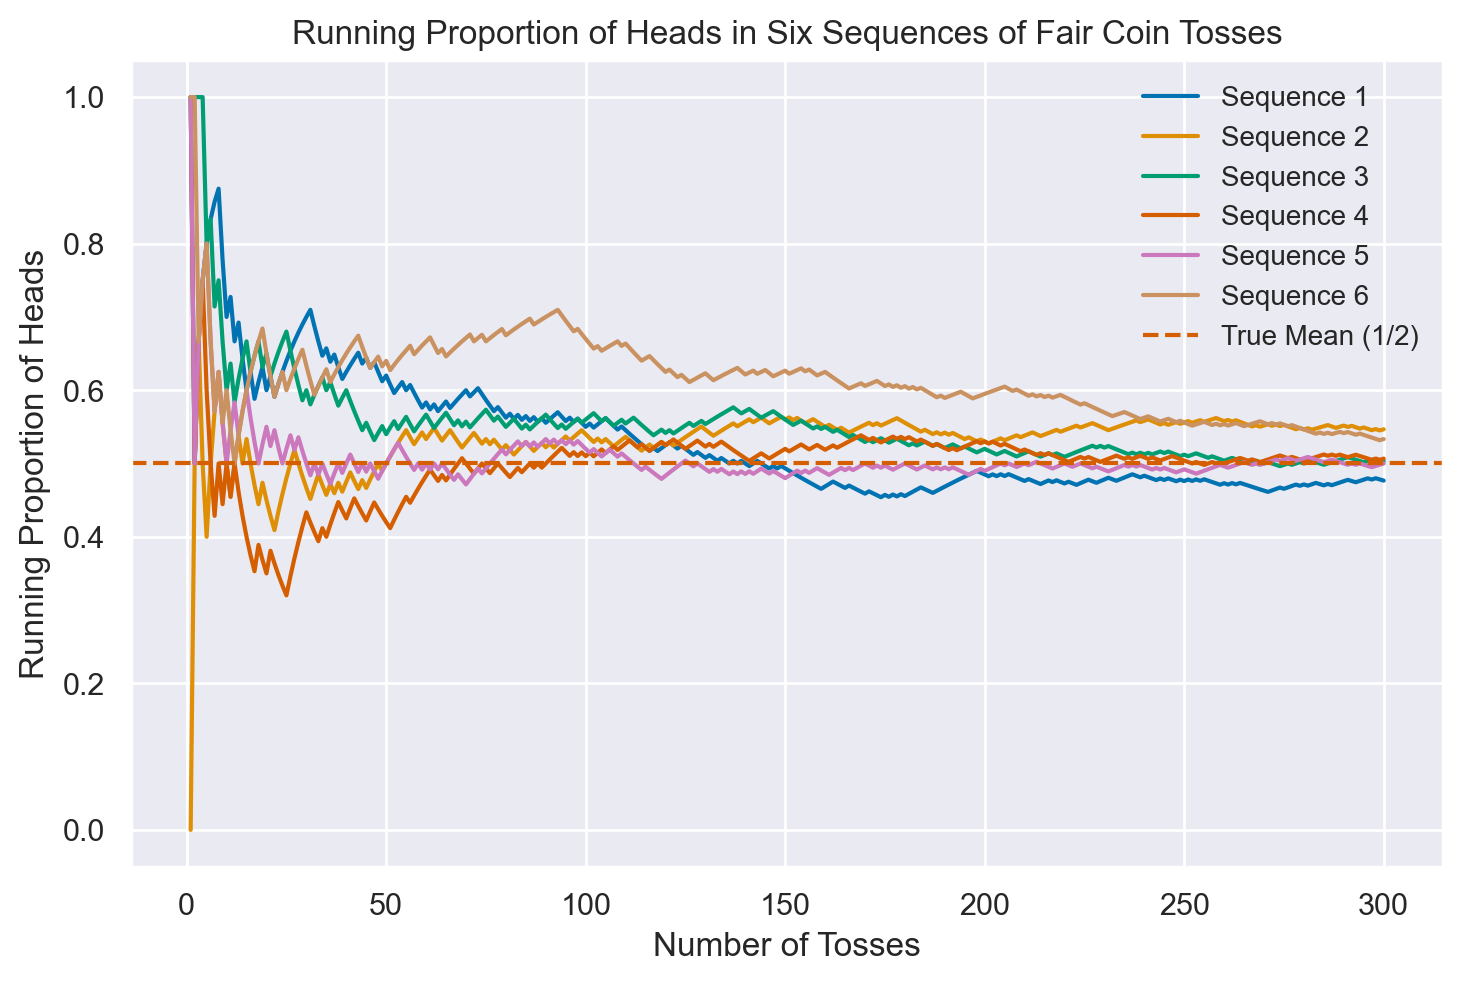

In [14]:
# Number of sequences
num_sequences = 6
# Number of tosses
num_tosses = 300
# Initialize a figure
plt.figure()

# Loop through each sequence
for i in range(num_sequences):
    
    # Generate a sequence of fair coin tosses (Heads=1, Tails=0)
    coin_tosses = np.random.choice([0, 1], num_tosses)
    
    # Calculate the running proportion of Heads
    running_proportion = np.cumsum(coin_tosses) / np.arange(1, num_tosses + 1)
    
    # Plot the running proportion as a function of the number of tosses
    plt.plot(np.arange(1, num_tosses + 1), running_proportion, label=f'Sequence {i+1}')

# Plotting the true mean (1/2)
plt.axhline(y=0.5, color='r', linestyle='--', label='True Mean (1/2)')

# Adding labels and title
plt.xlabel('Number of Tosses')
plt.ylabel('Running Proportion of Heads')
plt.title('Running Proportion of Heads in Six Sequences of Fair Coin Tosses')
plt.legend()
plt.legend(fontsize='small')
plt.show()

:::

## Teorema del Limite Centrale

Il teorema del limite centrale è un risultato fondamentale in statistica che è stato dimostrato per la prima volta da Laplace nel 1812. Esso fornisce una spiegazione matematica per il motivo per cui la distribuzione normale appare così frequentemente nei fenomeni naturali. Ecco la formulazione essenziale:

### Enunciato

Supponiamo di avere una sequenza di variabili aleatorie indipendenti ed identicamente distribuite (i.i.d.), $Y = Y_1, \dots, Y_i, \ldots, Y_n$, ciascuna con valore atteso $\mathbb{E}(Y_i) = \mu$ e deviazione standard $SD(Y_i) = \sigma$. Definiamo una nuova variabile casuale come la media aritmetica di queste variabili:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Allora, quando $n$ tende all'infinito, la distribuzione di $Z$ convergerà a una distribuzione normale con media $\mu$ e deviazione standard ridotta di un fattore $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{\sigma}{\sqrt{n}}\right).
$$

### Significato e generalizzazione

Il TLC non si applica solo alle variabili casuali con la stessa distribuzione, ma può essere esteso a variabili casuali indipendenti con aspettative e varianze finite. La potenza del teorema sta nella sua capacità di descrivere fenomeni che sono il risultato di molteplici effetti additivi indipendenti. Anche se questi effetti possono avere distribuzioni diverse, la loro somma tende a una distribuzione normale.

Ad esempio, l'altezza degli esseri umani adulti può essere vista come la somma di molti fattori genetici e ambientali indipendenti. Indipendentemente dalla distribuzione individuale di questi fattori, la loro combinazione tende a formare una distribuzione normale. Questa universalità rende la distribuzione normale una buona approssimazione per molti fenomeni naturali.

::: {#exm-}

Per visualizzare il TLC in azione, si può condurre una simulazione. Immaginiamo una popolazione iniziale con una distribuzione asimmetrica, come una Beta(2, 1). Estraiamo 50.000 campioni di dimensione $n$ da questa popolazione e osserviamo come la distribuzione campionaria di tali medie converga a una distribuzione normale. Questa simulazione fornirà un'illustrazione concreta dell'efficacia del TLC nell'approssimare distribuzioni reali.

In [15]:
# parameters of the beta distribution
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means)
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2)
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

Se l'ampiezza campionaria è 1, allora la ditribuzione campionaria delle medie coincide con la popolazione.

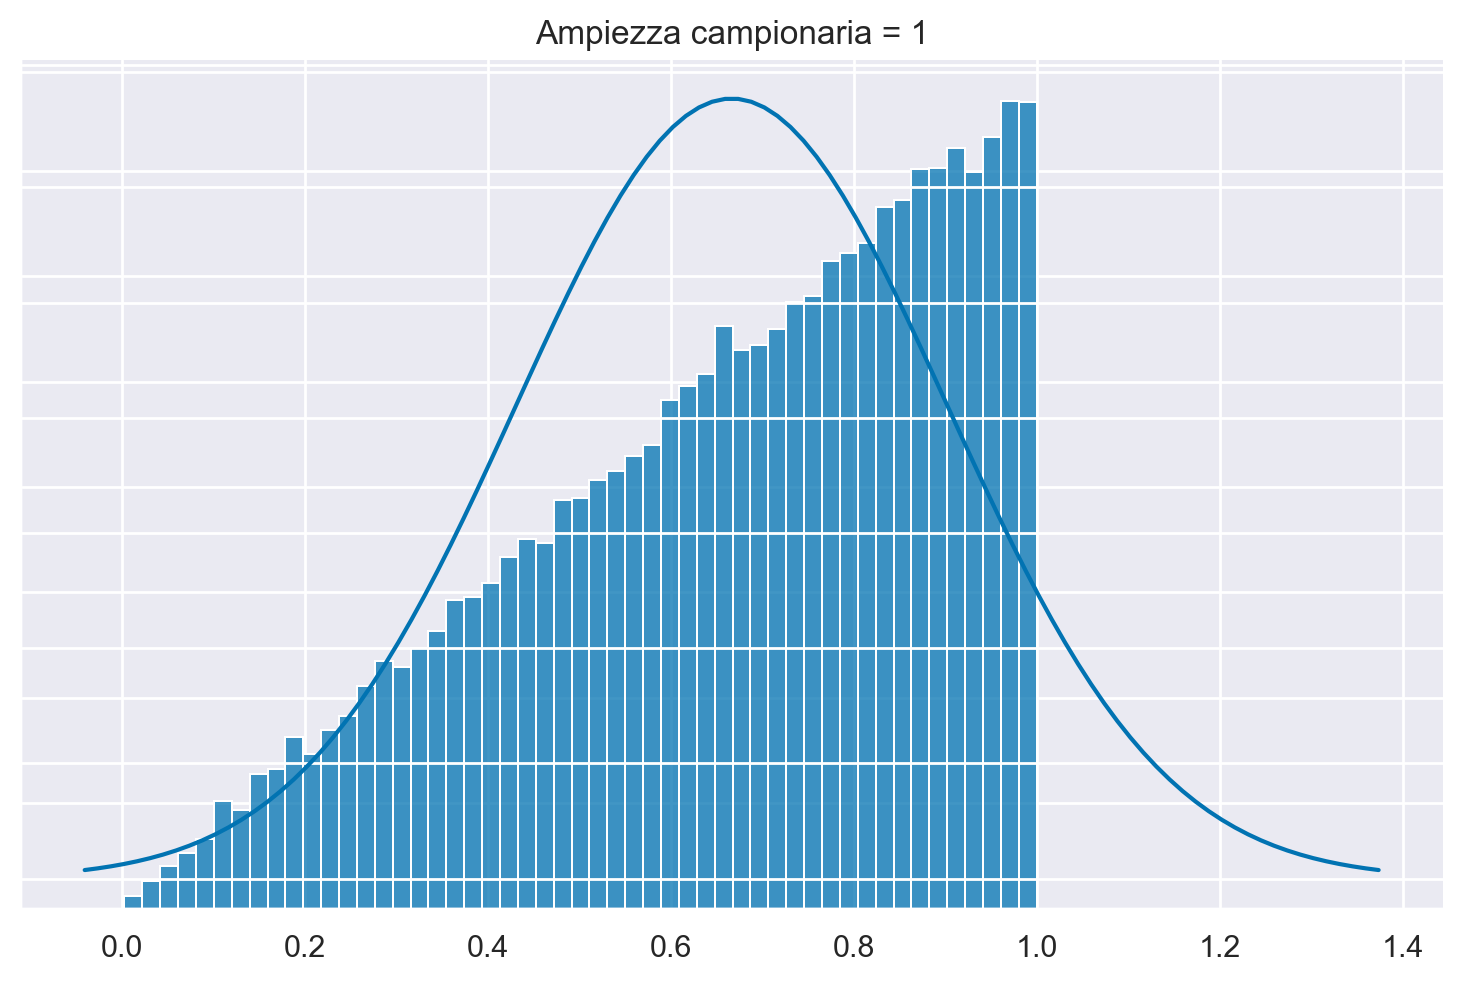

In [15]:
plotSamples(1)

Con $n$ = 2, la distribuzione delle medie dei campioni non è certamente Normale, inizia ad avvicinarsi alla gaussianità.

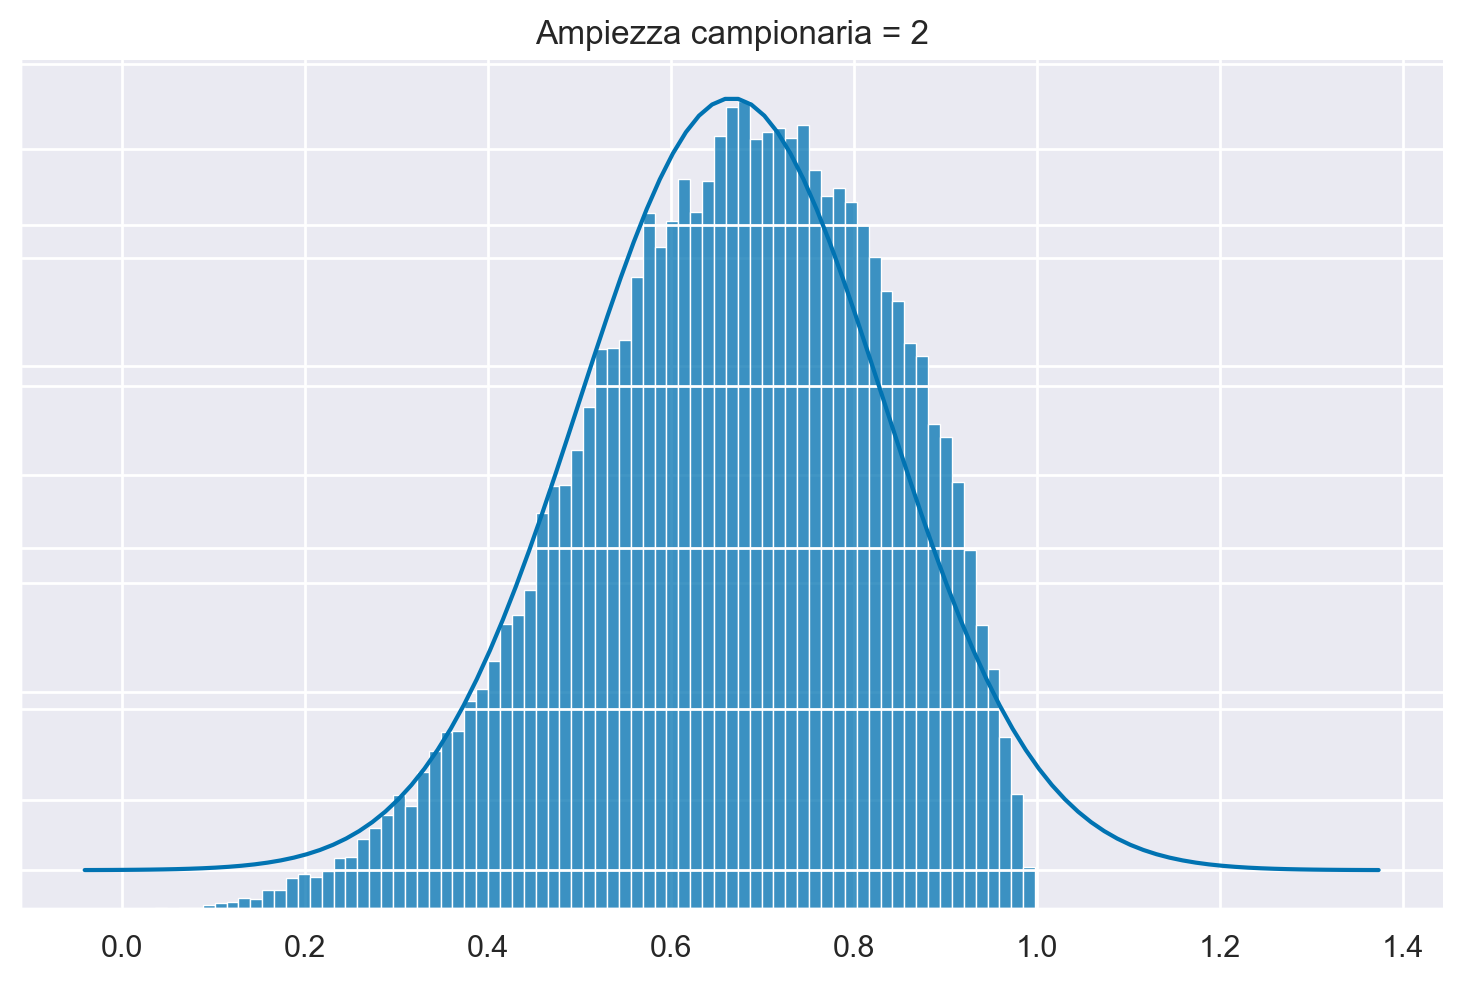

In [16]:
plotSamples(2)

Con $n$ = 4 c'è ancora una grande differenza tra la distribuzione campionaria delle medie dei campioni e la distribuzione normale, ma l'approssimazione migliora.

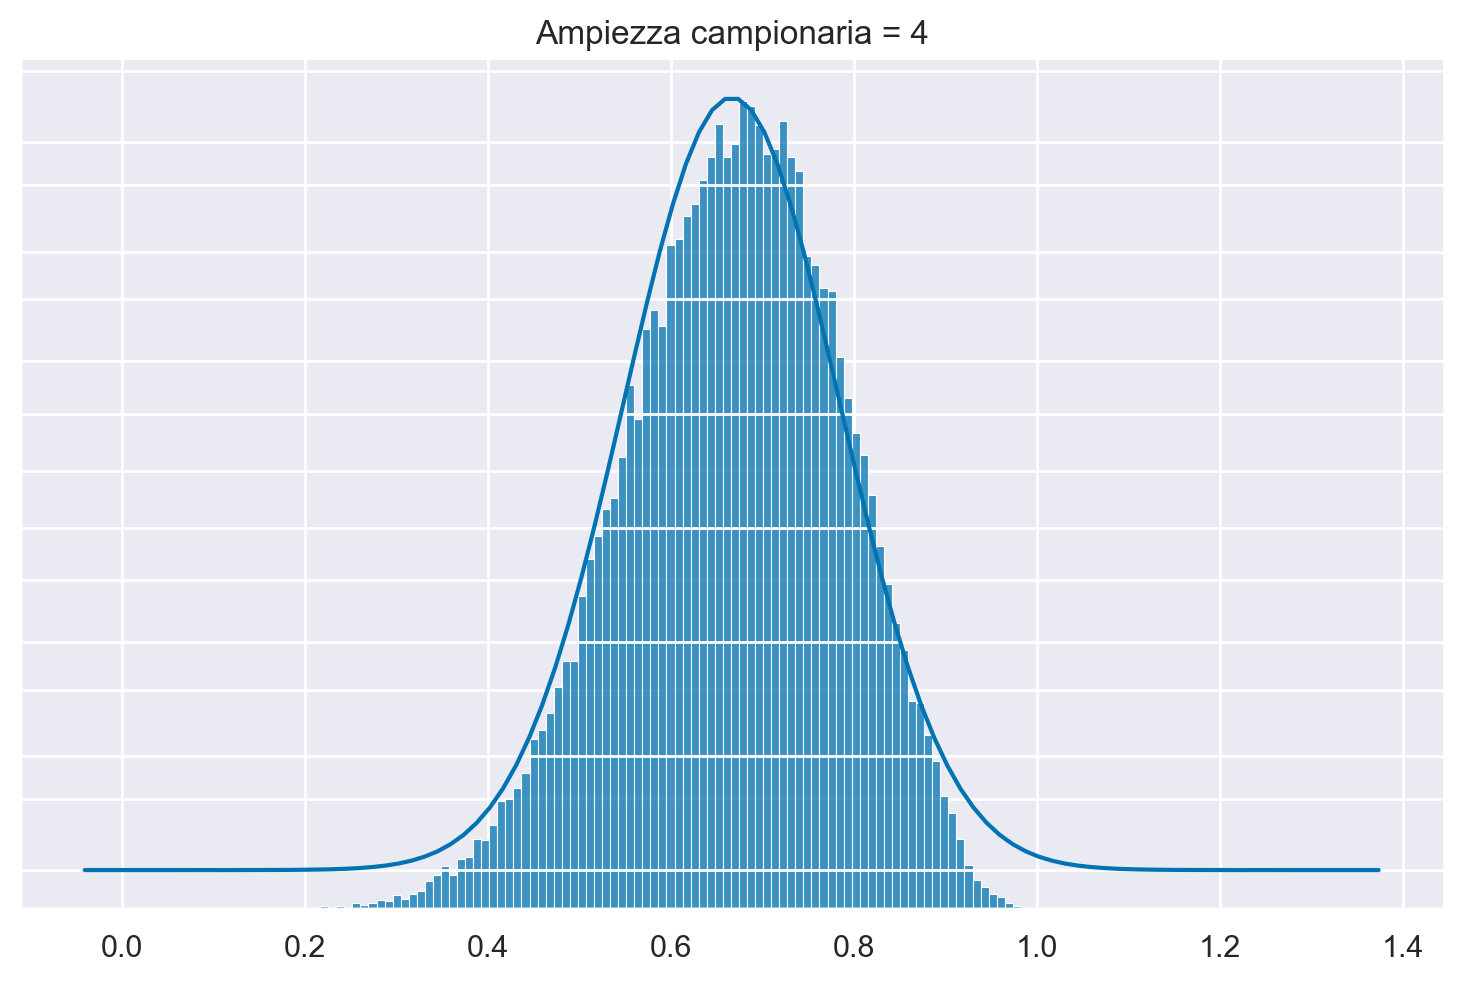

In [17]:
plotSamples(4)

Con $n$ = 30 la funzione $\mathcal{N}(100, 15/\sqrt{50})$ fornisce una buona approssimazione alla distribuzione campionaria delle medie dei campioni.

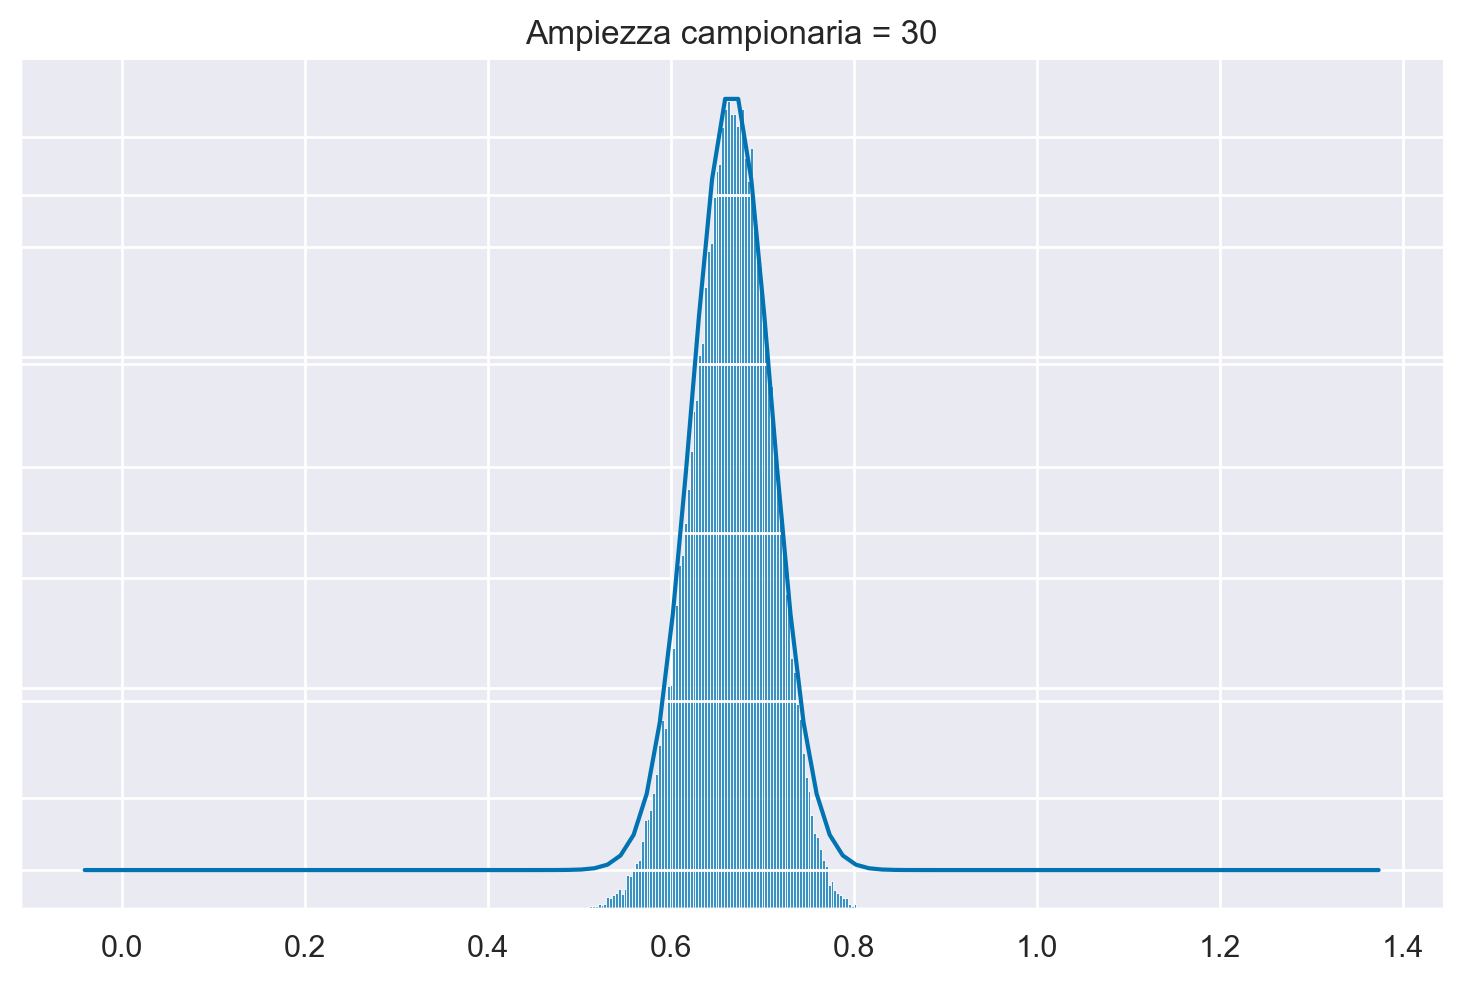

In [18]:
plotSamples(30)

:::

In conclusione, il teorema del limite centrale (TLC) stabilisce che, a meno che non si stia lavorando con campioni estremamente piccoli, è possibile approssimare con buona precisione la distribuzione campionaria della media dei campioni utilizzando la distribuzione Normale. Questo vale indipendentemente dalla forma specifica della distribuzione della popolazione da cui sono tratti i campioni. In altre parole, quando si lavora con campioni di dimensioni sufficienti, il TLC offre una formula concreta per descrivere la forma della distribuzione campionaria della media dei campioni. Ciò avviene anche se non si hanno informazioni dettagliate sulla popolazione, come la media $\mu$ e la deviazione standard $\sigma$, ed è espresso dalla relazione $\bar{X} \sim \mathcal{N}(\mu, \sigma/\sqrt{n})$.

## Distribuzioni campionarie di altre statistiche

In precedenza abbiamo descritto la distribuzione campionaria della media dei campioni. Ma ovviamente è possibile costruire la distribuzione campionaria di altre statistiche campionarie.  Ad esempio, la figura seguente mostra l'approssimazione empirica della distribuzione campionaria del valore massimo del campione. È chiaro che, se da ciascun campione estraiamo il valore massimo, il valore atteso della distribuzione campionaria di questa statistica sarà maggiore della media della popolazione.

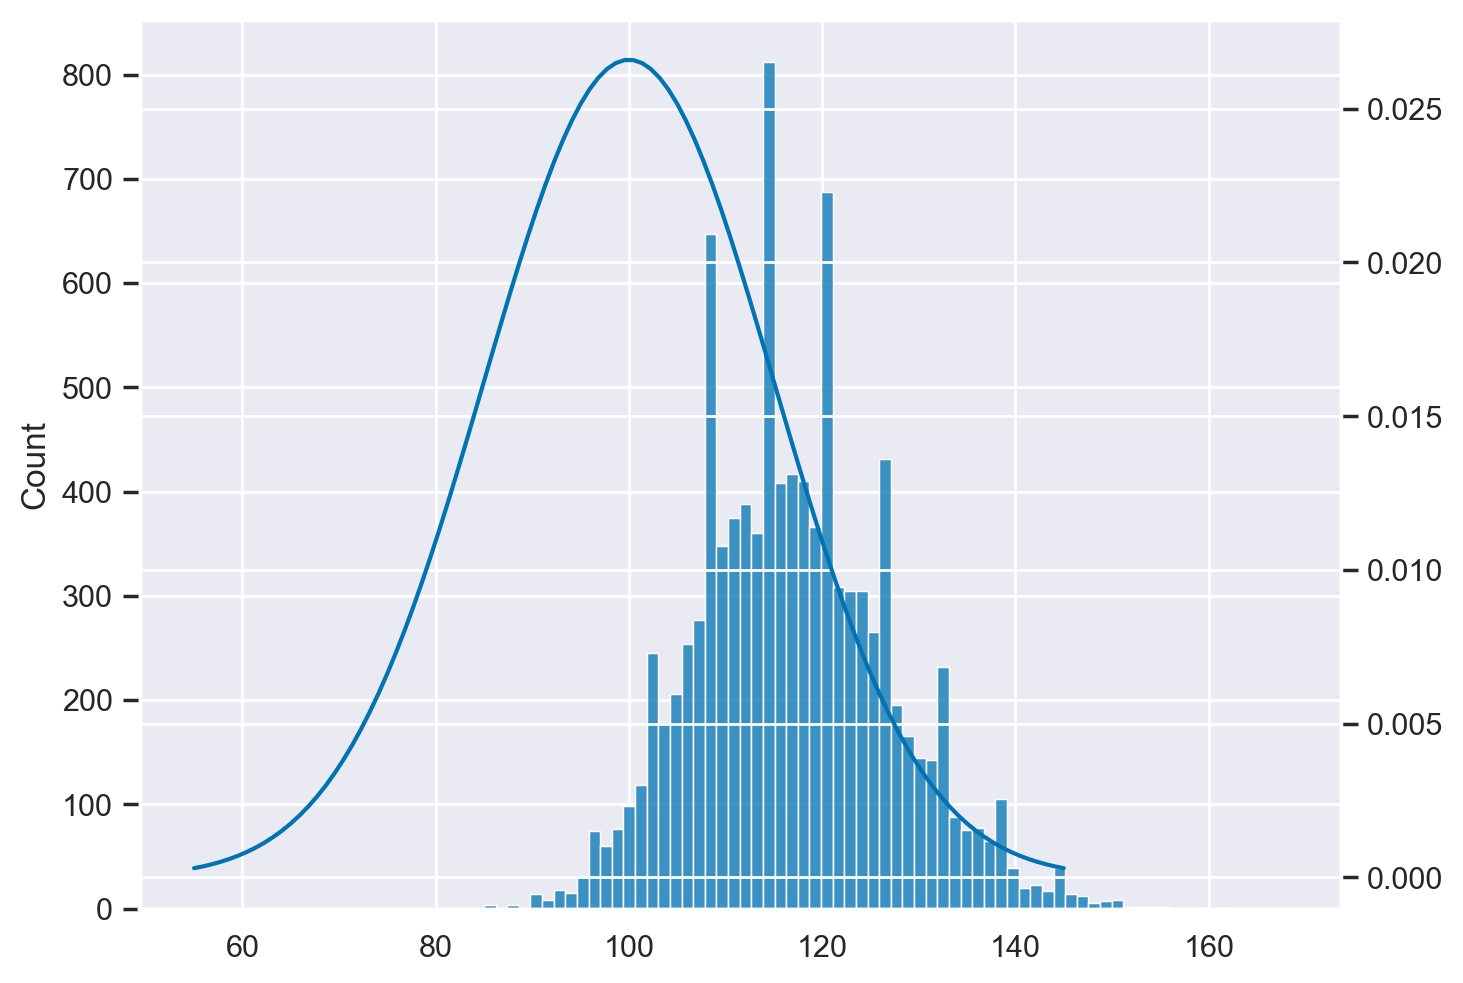

In [19]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, ax=ax2);

La distribuzione campionaria della varianza dei campioni è particolarmente interessante. Usiamo la formula della statistica descrittiva, ovvero

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

Una volta compresa la procedura, possiamo creare un grafico che rappresenta l'approssimazione empirica della distribuzione campionaria della varianza dei punteggi del quoziente di intelligenza. Sapendo che la varianza della popolazione è uguale a $15^2$, abbiamo utilizzato la simulazione per stimare la varianza della popolazione. Tuttavia, il risultato ottenuto è stato interessante: in media, l'utilizzo della formula precedente ha portato a una stima della varianza della popolazione troppo piccola. Gli statistici chiamano questa discrepanza *distorsione*, ovvero quando il valore atteso di uno stimatore non coincide con il parametro.

179.50722157374443

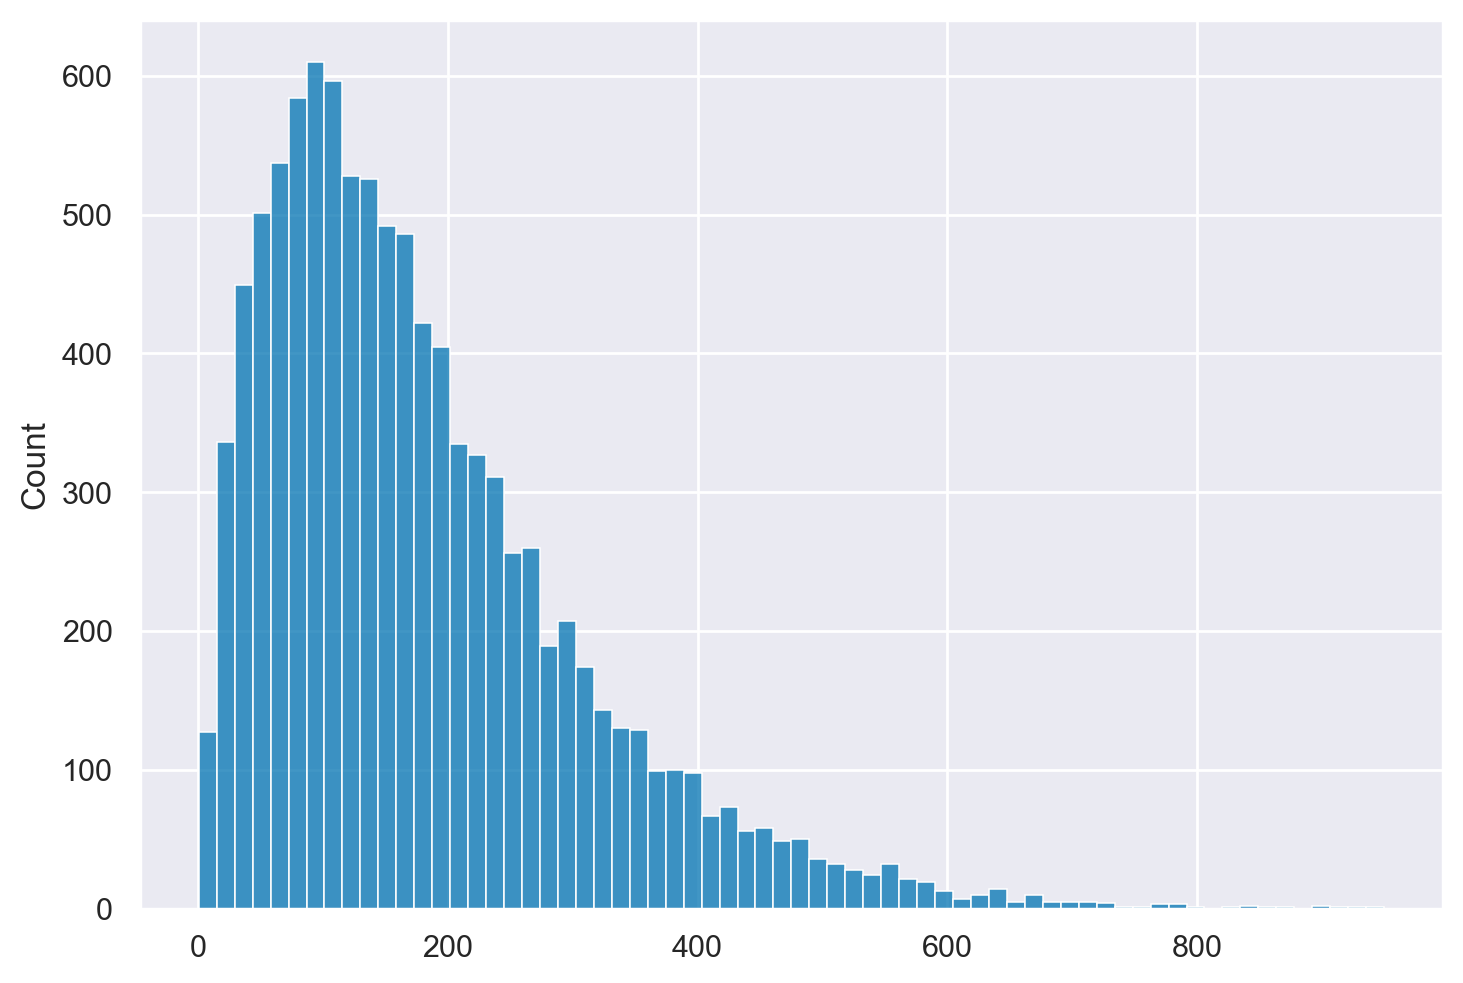

In [20]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

Abbiamo già visto come questo problema trova una semplice soluzione nel momento in cui usiamo $n-1$ al denominatore.

224.41297510577323

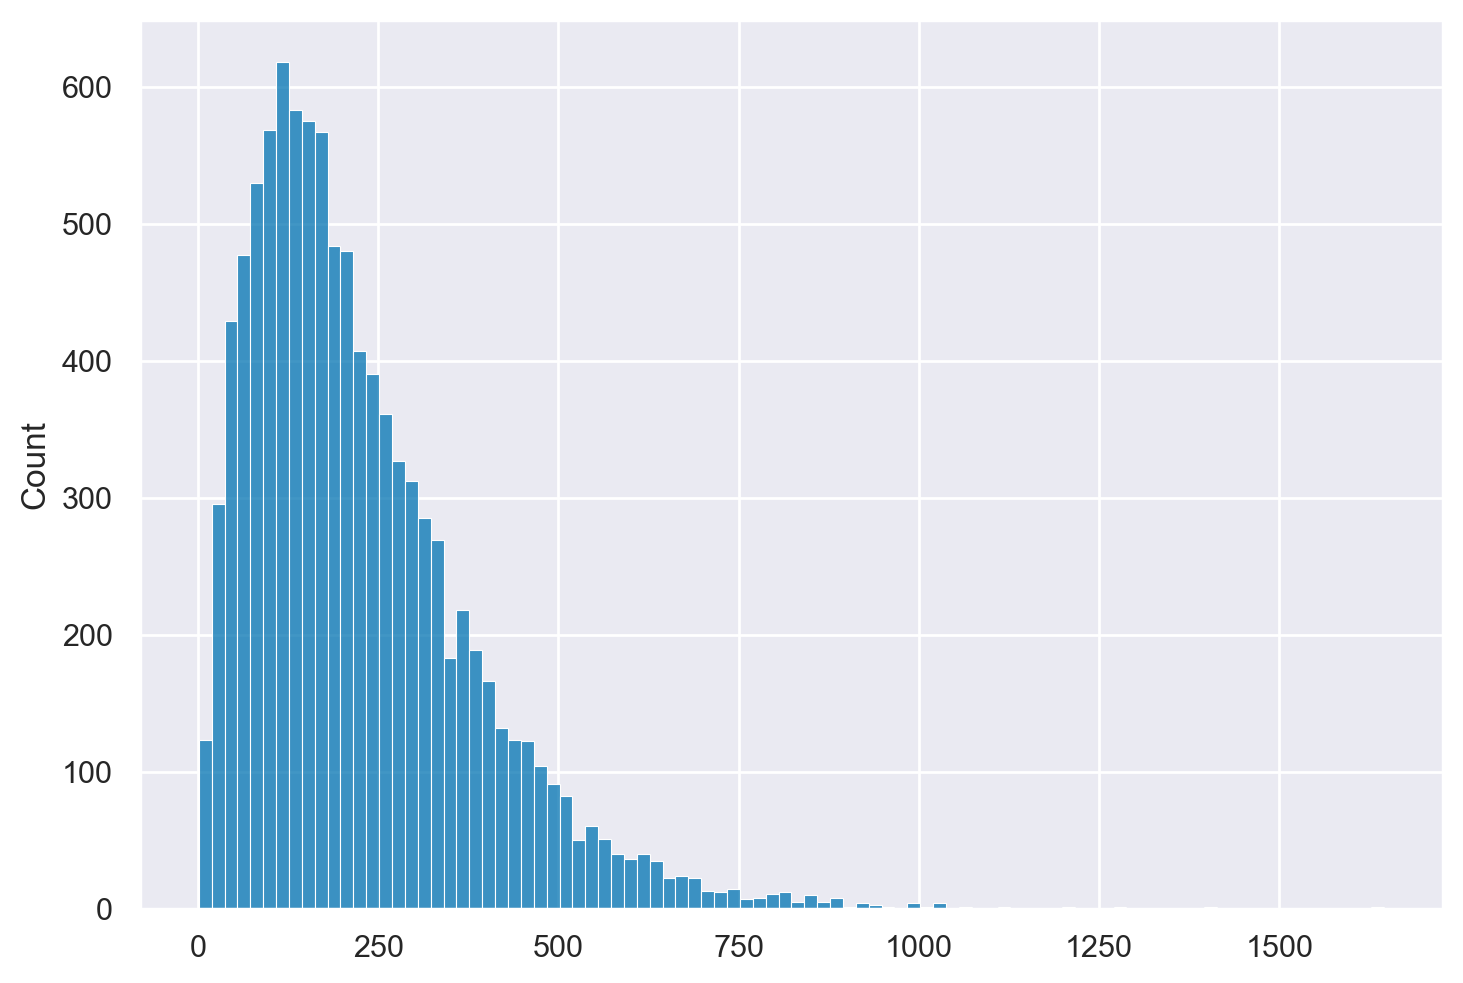

In [21]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

La differenza tra la stima di un parametro e il valore vero del parametro è chiamata *errore della stima*. Uno stimatore si dice *non distorto* (*unbiased*) se la media delle sue stime su molteplici campioni ipotetici è uguale al valore del parametro che si vuole stimare. In altre parole, l'errore medio di stima è zero. 

In questo capitolo abbiamo visto che $\frac{\sum_{i=1}^n{X_i}}{n}$ è uno stimatore non distorto di $\mu$ e che $\frac{\sum_{i=1}^n{(^2)}}{n-1}$ è uno stimatore non distorto di $\sigma^2$. Questo significa che tali stimatori hanno una distribuzione campionaria centrata sul vero valore del parametro. 

## Considerazioni conclusive

In generale, i parametri della popolazione sono sconosciuti, ma possiamo stimarli utilizzando le informazioni del campione. Di seguito viene presentata una tabella che riassume i simboli comuni utilizzati per indicare le quantità note e sconosciute nel contesto dell'inferenza statistica. Questo ci aiuterà a tenere traccia di ciò che sappiamo e ciò che non sappiamo.

|Simbolo          | Nome           | È qualcosa che conosciamo?     |
|:----------------|:-------------|:--------------------|
|$s$              |Deviazione standard del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma$         |Deviazione standard della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}$  | Stima della deviazione standard della popolazione | Sì, ma non è uguale a $\sigma$ |
|$s^2$            | Varianza del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma^2$       | Varianza della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}^2$ | Stima della varianza della popolazione  | Sì, ma non è uguale a $\sigma^2$  |

Utilizzando le informazioni di un campione casuale di ampiezza $n$:

- La stima migliore che possiamo ottenere per la media $\mu$ della popolazione è la media del campione $\bar{Y}$.
- La stima migliore che possiamo ottenere per la varianza $\sigma^2$ della popolazione è:

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2.
$$

## Watermark

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Jul 27 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
pandas    : 2.2.2
matplotlib: 3.9.1
scipy     : 1.14.0
arviz     : 0.18.0
numpy     : 1.26.4

Watermark: 2.4.3

